# Обработка временных данных

Используем `resample()`; объединяем данные из множества файлов в одну таблицу.

## Загрузка библиотек

In [2]:
import pandas as pd
import os
from datetime import datetime as dt

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

## Описание данных

В следующих задачах мы будем работать с сэмплами данных об аренде велосипедов в Чикаго:

- `trip_id` — id поездки;
- `start_time` — Дата и время начала поездки
- `end_time` — Дата и время конца поездки
- `bikeid` — id велосипеда
- `tripduration` — продолжительность поездки в минутах
- `from_station_id` — id станции начала поездки
- `from_station_name` — название пункта отправления
- `to_station_id` — id пункта прибытия
- `to_station_name` — название пункта прибытия
- `usertype` — тип пользователя
- `gender` — пол (если `subscriber`)
- `birthyear` — год рождения (если `subscriber`)

## Применяем `resample()` для данных за первый квартал

In [3]:
bikes_dir = './bikes/'

Для начала, возьмем данные только за Q1 (первый квартал):

In [4]:
bikes_q1 = pd.read_csv(bikes_dir + 'bikes_q1_sample.csv')

In [5]:
print(bikes_q1.shape[0], "строк и", bikes_q1.shape[1], "колонок.")
print(bikes_q1.dropna().shape[0], "строк после удаления строк, содержащих NULL")
print(bikes_q1.drop_duplicates().shape[0], "строк после удаления дубликатов")

174215 строк и 12 колонок.
164159 строк после удаления строк, содержащих NULL
174215 строк после удаления дубликатов


In [6]:
bikes_q1.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,17617135,2018-01-22 20:04:31,2018-01-22 20:11:53,1131,442.0,471,Francisco Ave & Foster Ave,468,Budlong Woods Library,Subscriber,Female,1949.0
1,17897619,2018-03-16 19:47:59,2018-03-16 20:04:00,6146,961.0,296,Broadway & Belmont Ave,253,Winthrop Ave & Lawrence Ave,Subscriber,Male,1988.0
2,17881307,2018-03-14 18:49:20,2018-03-14 18:54:38,3847,318.0,260,Kedzie Ave & Milwaukee Ave,503,Drake Ave & Fullerton Ave,Subscriber,Male,1987.0
3,17881130,2018-03-14 18:33:48,2018-03-14 19:07:40,1483,"2,032.0",199,Wabash Ave & Grand Ave,199,Wabash Ave & Grand Ave,Subscriber,Male,1990.0
4,17686289,2018-02-05 17:39:14,2018-02-05 17:46:13,6391,419.0,596,Benson Ave & Church St,605,University Library (NU),Subscriber,Male,1992.0


In [7]:
bikes_q1.dtypes

trip_id                int64
start_time            object
end_time              object
bikeid                 int64
tripduration          object
from_station_id        int64
from_station_name     object
to_station_id          int64
to_station_name       object
usertype              object
gender                object
birthyear            float64
dtype: object

Перед тем как сделать `.resample()`, нужно немного подготовить данные. Поместим колонку `start_time` в качестве индекса и сохраним изменения в исходный датасет. Предварительно проверим тип переменной и приведём её к правильному, если необходимо.

In [8]:
bikes_q1['start_time'] = pd.to_datetime(bikes_q1.start_time)
bikes_q1['end_time'] = pd.to_datetime(bikes_q1.end_time)

In [9]:
bikes_q1 = bikes_q1.set_index('start_time')

In [10]:
bikes_q1 = bikes_q1.sort_index()
bikes_q1.head(3)

,trip_id,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
start_time,,,,,,,,,,,
2018-01-01 00:44:46,17536704,2018-01-01 01:33:10,4599,"2,904.0",98,LaSalle St & Washington St,509,Troy St & North Ave,Subscriber,Male,1989.0
2018-01-01 00:57:26,17536708,2018-01-01 01:02:40,1169,314.0,164,Franklin St & Lake St,174,Canal St & Madison St,Subscriber,Male,1998.0
2018-01-01 01:07:54,17536711,2018-01-06 10:04:02,4783,"464,168.0",99,Lake Shore Dr & Ohio St,99,Lake Shore Dr & Ohio St,Customer,NaN,NaN


В данных имеется как дата аренды, так и её точное время начала и окончания с точностью до секунд. Применим метод `resample()` и агрегируем данные по дням.

In [11]:
bikes_q1.resample(rule = 'D').sum()

,trip_id,bikeid,from_station_id,to_station_id,birthyear
start_time,,,,,
2018-01-01,3349561242,679058,42159,38962,364973.0
2018-01-02,13311733637,2872211,134037,131343,1500158.0
2018-01-03,19242971711,4080211,194219,195848,2145691.0
2018-01-04,19509618787,4189136,201018,196943,2175025.0
2018-01-05,17617932909,3561635,178645,176522,1967491.0
...,...,...,...,...,...
2018-03-27,49519967691,9874012,500510,506768,5044453.0
2018-03-28,65433876386,12722993,653508,654158,6473941.0
2018-03-29,50356503173,10194603,505335,503307,5160515.0


In [12]:
bikes_q1.resample(rule = 'D')['trip_id'].count().max()

4196

## Применяем `resample()` для данных за апрель

Посмотрим на распределение количества аренд для разных групп пользователей (`usertype`) — `customers` и `subscribers` в данных за апрель.

Сделаем ресемпл по дням для каждой группы и, для примера, найдём число аренд за 18 апреля, сделанных пользователями типа `Subscriber`.

In [11]:
bikes_april = pd.read_csv('bikes_april.csv')

In [12]:
print(bikes_april.shape[0], "строк и", bikes_april.shape[1], "колонок.")
print(bikes_april.dropna().shape[0], "строк после удаления строк, содержащих NULL")
print(bikes_april.drop_duplicates().shape[0], "строк после удаления дубликатов")

90144 строк и 12 колонок.
80132 строк после удаления строк, содержащих NULL
90144 строк после удаления дубликатов


In [13]:
bikes_april.head()

,start_time,trip_id,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,2018-04-01 00:10:23,18000531,2018-04-01 00:22:12,5065,709.0,228,Damen Ave & Melrose Ave,219,Damen Ave & Cortland St,Subscriber,Male,1983.0
1,2018-04-01 00:15:49,18000533,2018-04-01 00:19:47,4570,238.0,128,Damen Ave & Chicago Ave,130,Damen Ave & Division St,Subscriber,Male,1978.0
2,2018-04-01 00:17:00,18000534,2018-04-01 00:22:53,1323,353.0,130,Damen Ave & Division St,69,Damen Ave & Pierce Ave,Subscriber,Male,1991.0
3,2018-04-01 00:20:00,18000536,2018-04-01 00:26:22,2602,382.0,121,Blackstone Ave & Hyde Park Blvd,351,Cottage Grove Ave & 51st St,Subscriber,Female,1992.0
4,2018-04-01 00:23:19,18000538,2018-04-01 00:35:01,4213,702.0,31,Franklin St & Chicago Ave,180,Ritchie Ct & Banks St,Subscriber,Male,1985.0


In [14]:
print(bikes_april.columns.to_list())

['start_time', 'trip_id', 'end_time', 'bikeid', 'tripduration', 'from_station_id', 'from_station_name', 'to_station_id', 'to_station_name', 'usertype', 'gender', 'birthyear']


In [17]:
bikes_april.dtypes

start_time            object
trip_id                int64
end_time              object
bikeid                 int64
tripduration          object
from_station_id        int64
from_station_name     object
to_station_id          int64
to_station_name       object
usertype              object
gender                object
birthyear            float64
dtype: object

In [18]:
bikes_april['start_time'] = pd.to_datetime(bikes_april.start_time)
bikes_april['end_time'] = pd.to_datetime(bikes_april.end_time)

Число аренд за 18 апреля, сделанных пользователями типа `Subscriber`:

In [19]:
bikes_april\
    .set_index('start_time') \
    .sort_index() \
    .groupby('usertype') \
    .resample(rule = 'D') \
    ['trip_id'] \
    .count() \
    .to_frame() \
    .rename(columns = {'trip_id': 'rents_number'}) \
    .loc['Subscriber','2018-04-18',:]['rents_number'][0]

2196

## Применяем `resample()` для данных с апреля по декабрь

Объединим сэмплы данных за нужные месяцы в один общий датасет `bikes`. Сделаем преобразование по дням для каждой группы пользователей (usertype), затем выберем дни, в которые число аренд, сделанных `customers`, было больше, чем у `subscribers`.

In [16]:
filenames = os.listdir(bikes_dir)
filenames

['bikes_q1_sample.csv',
 'bikes_q2_sample_apr.csv',
 'bikes_q2_sample_jun.csv',
 'bikes_q2_sample_may.csv',
 'bikes_q3_sample_aug.csv',
 'bikes_q3_sample_july.csv',
 'bikes_q3_sample_sep.csv',
 'bikes_q4_sample_dec.csv',
 'bikes_q4_sample_nov.csv',
 'bikes_q4_sample_oct.csv']

In [17]:
bikes = pd.read_csv(bikes_dir + filenames[0])
for name in filenames[1:] :
    bikes = bikes.append(pd.read_csv(bikes_dir + name))

In [18]:
bikes = bikes.sort_values(['start_time', 'trip_id'])

In [19]:
print(bikes.shape[0], "строк и", bikes.shape[1], "колонок.")
print(bikes.dropna().shape[0], "строк после удаления строк, содержащих NULL")
print(bikes.dropna(how='all').shape[0], "строк после удаления строк, полностью содержащих NULL")
print(bikes.drop_duplicates().shape[0], "строк после удаления дубликатов")

1138996 строк и 12 колонок.
966566 строк после удаления строк, содержащих NULL
1138996 строк после удаления строк, полностью содержащих NULL
1138996 строк после удаления дубликатов


In [20]:
bikes['start_time'] = pd.to_datetime(bikes.start_time)
bikes['end_time']   = pd.to_datetime(bikes.end_time)

In [21]:
bikes = bikes.reset_index(drop = True)

In [22]:
bikes.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,17536704,2018-01-01 00:44:46,2018-01-01 01:33:10,4599,"2,904.0",98,LaSalle St & Washington St,509,Troy St & North Ave,Subscriber,Male,1989.0
1,17536708,2018-01-01 00:57:26,2018-01-01 01:02:40,1169,314.0,164,Franklin St & Lake St,174,Canal St & Madison St,Subscriber,Male,1998.0
2,17536711,2018-01-01 01:07:54,2018-01-06 10:04:02,4783,"464,168.0",99,Lake Shore Dr & Ohio St,99,Lake Shore Dr & Ohio St,Customer,NaN,NaN
3,17536715,2018-01-01 01:15:59,2018-01-01 01:21:45,6330,346.0,85,Michigan Ave & Oak St,106,State St & Pearson St,Subscriber,Female,1993.0
4,17536718,2018-01-01 01:25:15,2018-01-01 01:36:32,6099,677.0,462,Winchester (Ravenswood) Ave & Balmoral Ave,238,Wolcott (Ravenswood) Ave & Montrose Ave (*),Subscriber,Male,1979.0


In [23]:
orders = bikes.set_index('start_time') \
    .groupby('usertype') \
    .resample(rule = 'D') \
    .size().T

orders.columns.name = ''
orders.columns = orders.columns.str.lower()

In [24]:
orders.shape

(365, 2)

<AxesSubplot:xlabel='start_time', ylabel='customer'>

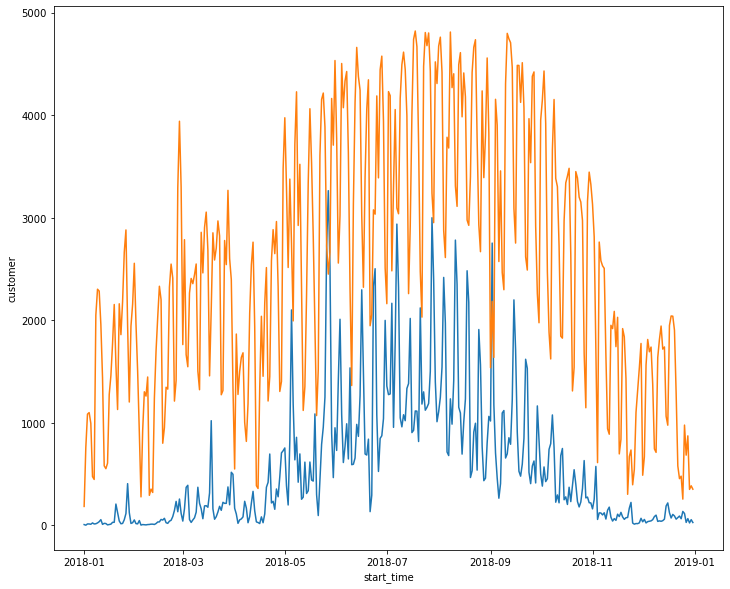

In [25]:
plt.figure(figsize=(12,10))
sns.lineplot(data = orders, x = orders.index, y = orders.customer)
sns.lineplot(data = orders, x = orders.index, y = orders.subscriber)

In [26]:
orders.query("customer > subscriber")

,customer,subscriber
start_time,,
2018-05-27,3263,2449
2018-09-02,2752,2183


## Применяем `resample()` для летнего периода

Еще один плюс использования дат в качестве индексов – возможность выбрать данные за интересующий нас промежуток времени.

В переменную `bikes_summer` сохраним наблюдения с 1 июня по 31 августа. Затем запишем в `top_destination` наиболее популярный пункт назначения (его название). Агрегируем данные по дням и определим, в какой день в полученный пункт (`top_destination`) было совершено меньше всего поездок. `timestamp` отформатируем с помощью .strftime('%Y-%m-%d').

In [27]:
bikes_summer = bikes.query("(start_time >= '2018-06-01') & (start_time <= '2018-08-31')")

In [28]:
bikes_summer.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
354916,18709077,2018-06-01 00:04:40,2018-06-01 00:06:47,3155,127.0,128,Damen Ave & Chicago Ave,214,Damen Ave & Grand Ave,Subscriber,Female,1978.0
354917,18709080,2018-06-01 00:06:08,2018-06-01 00:24:18,2807,"1,090.0",258,Logan Blvd & Elston Ave,69,Damen Ave & Pierce Ave,Customer,NaN,NaN
354918,18709086,2018-06-01 00:08:01,2018-06-01 00:32:55,2737,"1,494.0",337,Clark St & Chicago Ave,225,Halsted St & Dickens Ave,Customer,Male,1988.0
354919,18709091,2018-06-01 00:09:02,2018-06-01 00:19:21,6089,619.0,210,Ashland Ave & Division St,56,Desplaines St & Kinzie St,Subscriber,Male,1987.0
354920,18709092,2018-06-01 00:09:28,2018-06-01 00:14:44,2352,316.0,240,Sheridan Rd & Irving Park Rd,303,Broadway & Cornelia Ave,Subscriber,Male,1997.0


In [29]:
top_destination = bikes_summer['to_station_name'].value_counts().idxmax()
top_destination

'Streeter Dr & Grand Ave'

In [30]:
bad_day = \
    bikes_summer \
    .query("to_station_name == @top_destination") \
    .set_index('start_time') \
    .resample(rule = 'D') \
    .size() \
    .idxmin() \
    .strftime('%Y-%m-%d')

bad_day

'2018-06-21'

Куда больше всего ездят на выходных? Туда же, куда и в будние дни, или в другие пункты назначения?

In [31]:
some_day = bikes_summer['start_time'].iloc[0]
some_day

Timestamp('2018-06-01 00:04:40')

In [32]:
some_day.day_name()

'Friday'

In [33]:
bikes_summer['weekday'] = bikes_summer['start_time'].apply(lambda x: x.day_name())

bikes_summer['holiday'] = \
      (bikes_summer['weekday'] == 'Saturday') \
    | (bikes_summer['weekday'] == 'Sunday')

<ipython-input-33-22a6952d212d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bikes_summer['weekday'] = bikes_summer['start_time'].apply(lambda x: x.day_name())
<ipython-input-33-22a6952d212d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bikes_summer['holiday'] = \


In [34]:
bikes_summer[bikes_summer['holiday']]['to_station_name'].value_counts()

Streeter Dr & Grand Ave       6026
Lake Shore Dr & North Blvd    3092
Theater on the Lake           2858
Lake Shore Dr & Monroe St     2271
Millennium Park               1984
                              ... 
Cicero Ave & Flournoy St         1
Ellis Ave & 83rd St              1
Kostner Ave & Adams St           1
Ashland Ave & 63rd St            1
State St & 76th St               1
Name: to_station_name, Length: 569, dtype: int64

In [35]:
bikes_summer[bikes_summer['weekday'] == 'Saturday']['to_station_name'].value_counts()

Streeter Dr & Grand Ave       3461
Lake Shore Dr & North Blvd    1690
Theater on the Lake           1470
Lake Shore Dr & Monroe St     1232
Millennium Park               1080
                              ... 
Racine Ave & 65th St             1
State St & 76th St               1
Damen Ave & 51st St              1
Shields Ave & 43rd St            1
Halsted St & 47th Pl             1
Name: to_station_name, Length: 557, dtype: int64

In [36]:
bikes_summer[~bikes_summer['holiday']]['to_station_name'].value_counts()

Streeter Dr & Grand Ave         7491
Canal St & Adams St             6052
Clinton St & Washington Blvd    4782
Clinton St & Madison St         4628
Lake Shore Dr & North Blvd      4152
                                ... 
Racine Ave & 61st St               2
Malcolm X College                  1
Central Ave & Madison St           1
Throop St & 52nd St                1
Marion St & South Blvd             1
Name: to_station_name, Length: 578, dtype: int64

Наиболее популярный пункт назначения в субботу – Streeter Dr & Grand Ave

Второй по числу поездок в субботу – Lake Shore Dr & North Blvd

В будние дни больше всего поездок совершается до Streeter Dr & Grand Ave